### imports


In [24]:
# ipython extension to autoreload imported modules so that any changes will be up to date before running code in this nb
%load_ext autoreload 
%autoreload 2

# libraries
import numpy as np
import matplotlib.pyplot as plt

from lorenz import lorenzDataset, DEFAULT_TIME_RESOLUTION
from plotters import plot_data
from tuning import make_train_model, plot_model_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


THINGS TO TRY 
- write helper functions! 
- play with diff sample size (500) - v
- input/output day ratio - h 
- play around with buffer - v
- activation layers - h
- play with the hidden layers - v 
- diff data samples / diff lorenz params - h 
- diff optimizer alg - v 

### helper functions for hyperparameter testing

### prepare data


In [25]:
# TODO: add logging to see progress

# only uncomment each line if testing a non-default parameter
dataset = lorenzDataset(
    n_samples=10,
    # input_steps=2 * DEFAULT_TIME_RESOLUTION,  # 2 days
    # output_delay=1 * DEFAULT_TIME_RESOLUTION,  # 1 day
    # output_steps=1,
    min_buffer=-3 * DEFAULT_TIME_RESOLUTION,
    # rand_buffer=False,
    # K=36,
    # F=8,
    # c=10,
    # b=10,
    # h=1,
    # coupled=True,
    # time_resolution=DEFAULT_TIME_RESOLUTION,
    # seed=42
)

/Users/h.lu/spektral/datasets/Lorenz/10_200_1_100_-300_False_36_8_10_10_1_True_100_42.npz
False
total steps: 310
starting integration


In [26]:
train = dataset[:int(0.7 * dataset.n_graphs)]
val = dataset[int(0.7 * dataset.n_graphs):int(0.9 * dataset.n_graphs)]
test = dataset[int(0.9 * dataset.n_graphs):]

# normalize data
X1_mean, X1_std, X2_mean, X2_std = train.get_mean_std()

train.normalize(X1_mean, X1_std, X2_mean, X2_std)
val.normalize(X1_mean, X1_std, X2_mean, X2_std)
test.normalize(X1_mean, X1_std, X2_mean, X2_std)

inspect our data

plotting train
plotting val
plotting test
editing legend


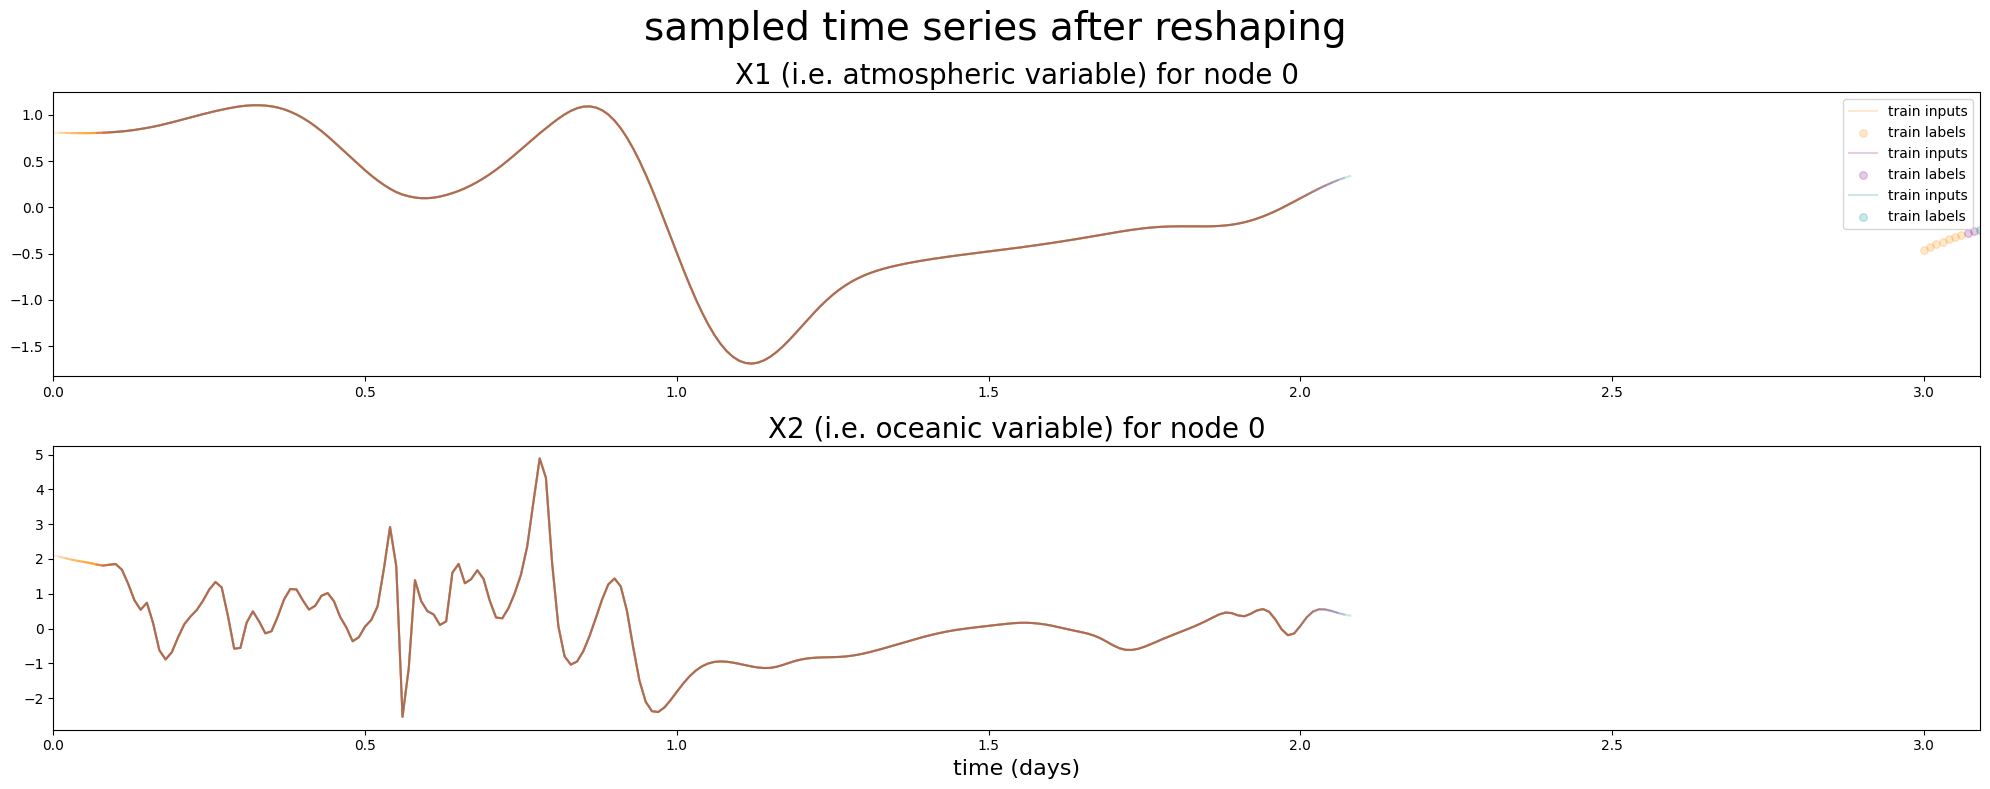

In [27]:
fig, (ax0, ax1) = plot_data(train, val, test, node=0)

plt.tight_layout()
plt.show()

### test hyperparameters

In [28]:
# speed test
model, history = make_train_model(train, val, activation="relu", eval_val=False)

Epoch 1/5
1/1 [==============================] - 1s 872ms/step - loss: 54.8021
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 10.8736
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 25.1495
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 28.8375
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 17.9286


TODO: run the training process while evaluating the val loss so that we get a better sense of performance/overfitting

for some reason my attempt to do that (in the next cell) has taken an endless amount of time to run and I don't know why

In [29]:
model, history = make_train_model(train, val, activation="relu", eval_val=True)

Epoch 1/5
1/1 [==============================] - ETA: 0s - loss: 39.0244

KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


32/32 [==============================] - 0s 4ms/step


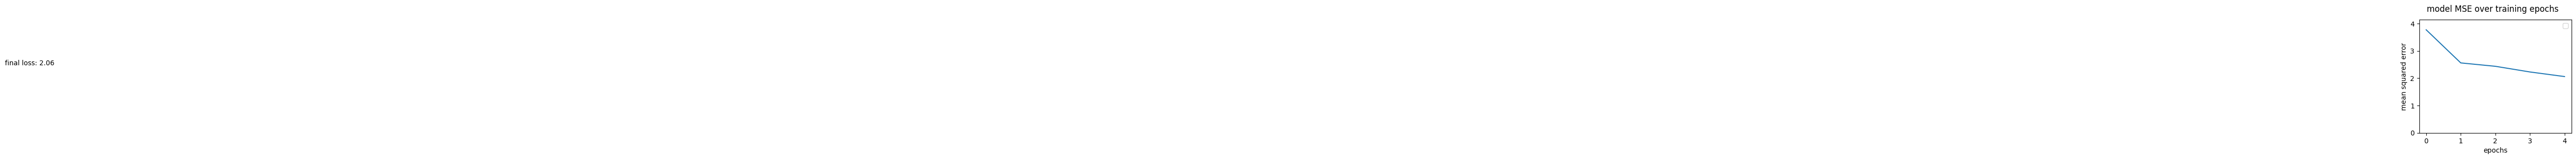

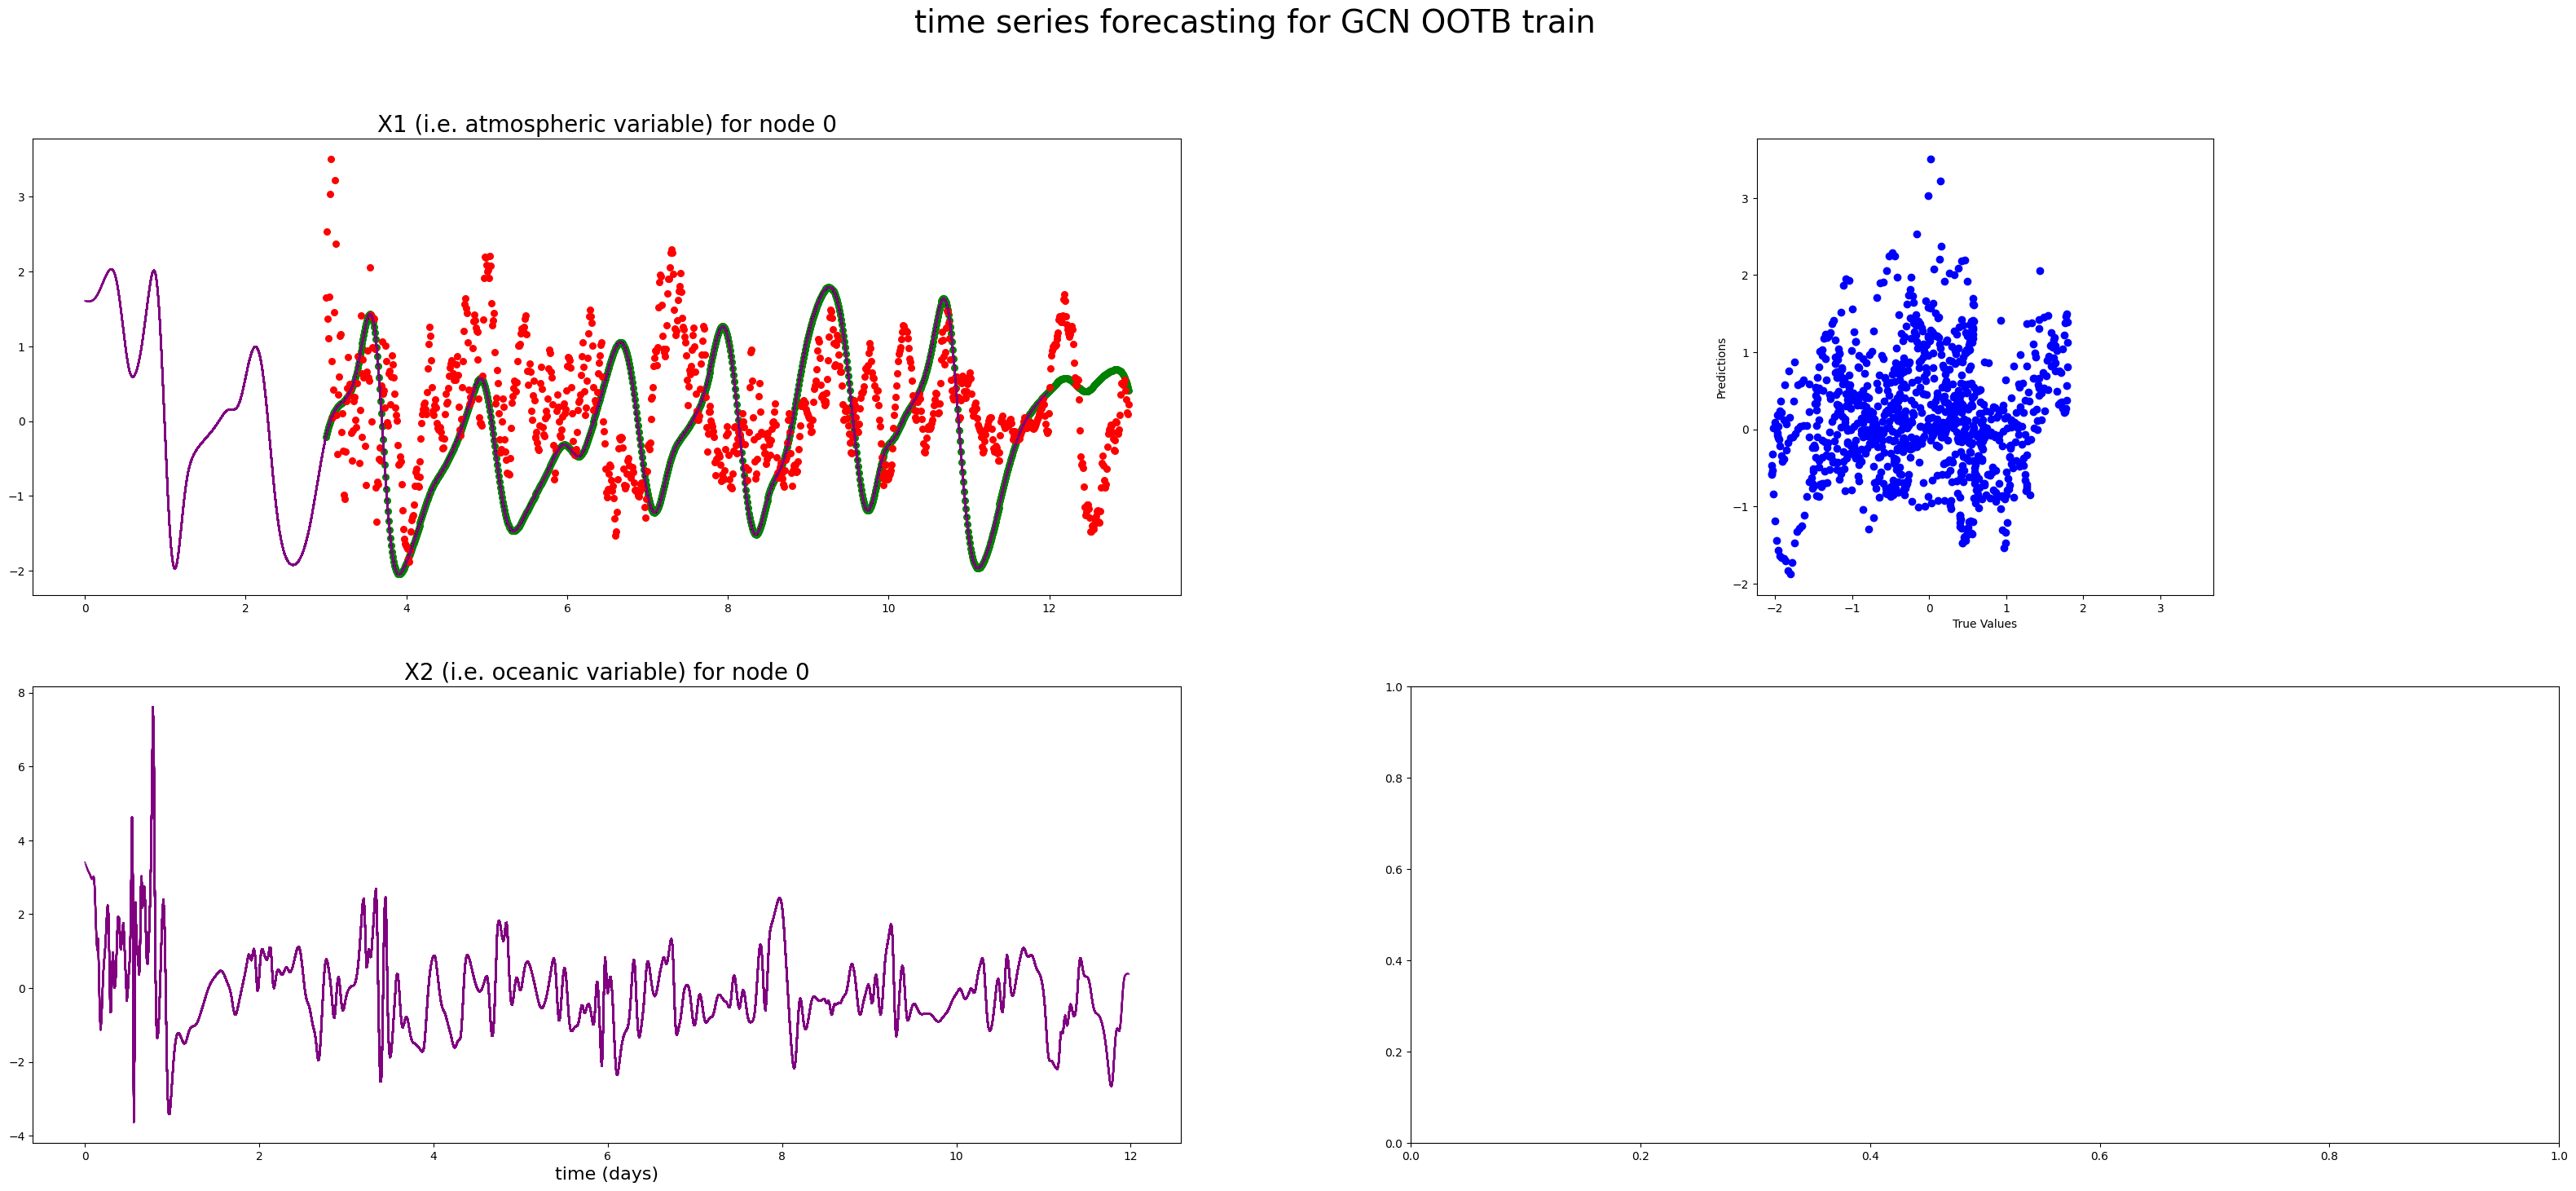

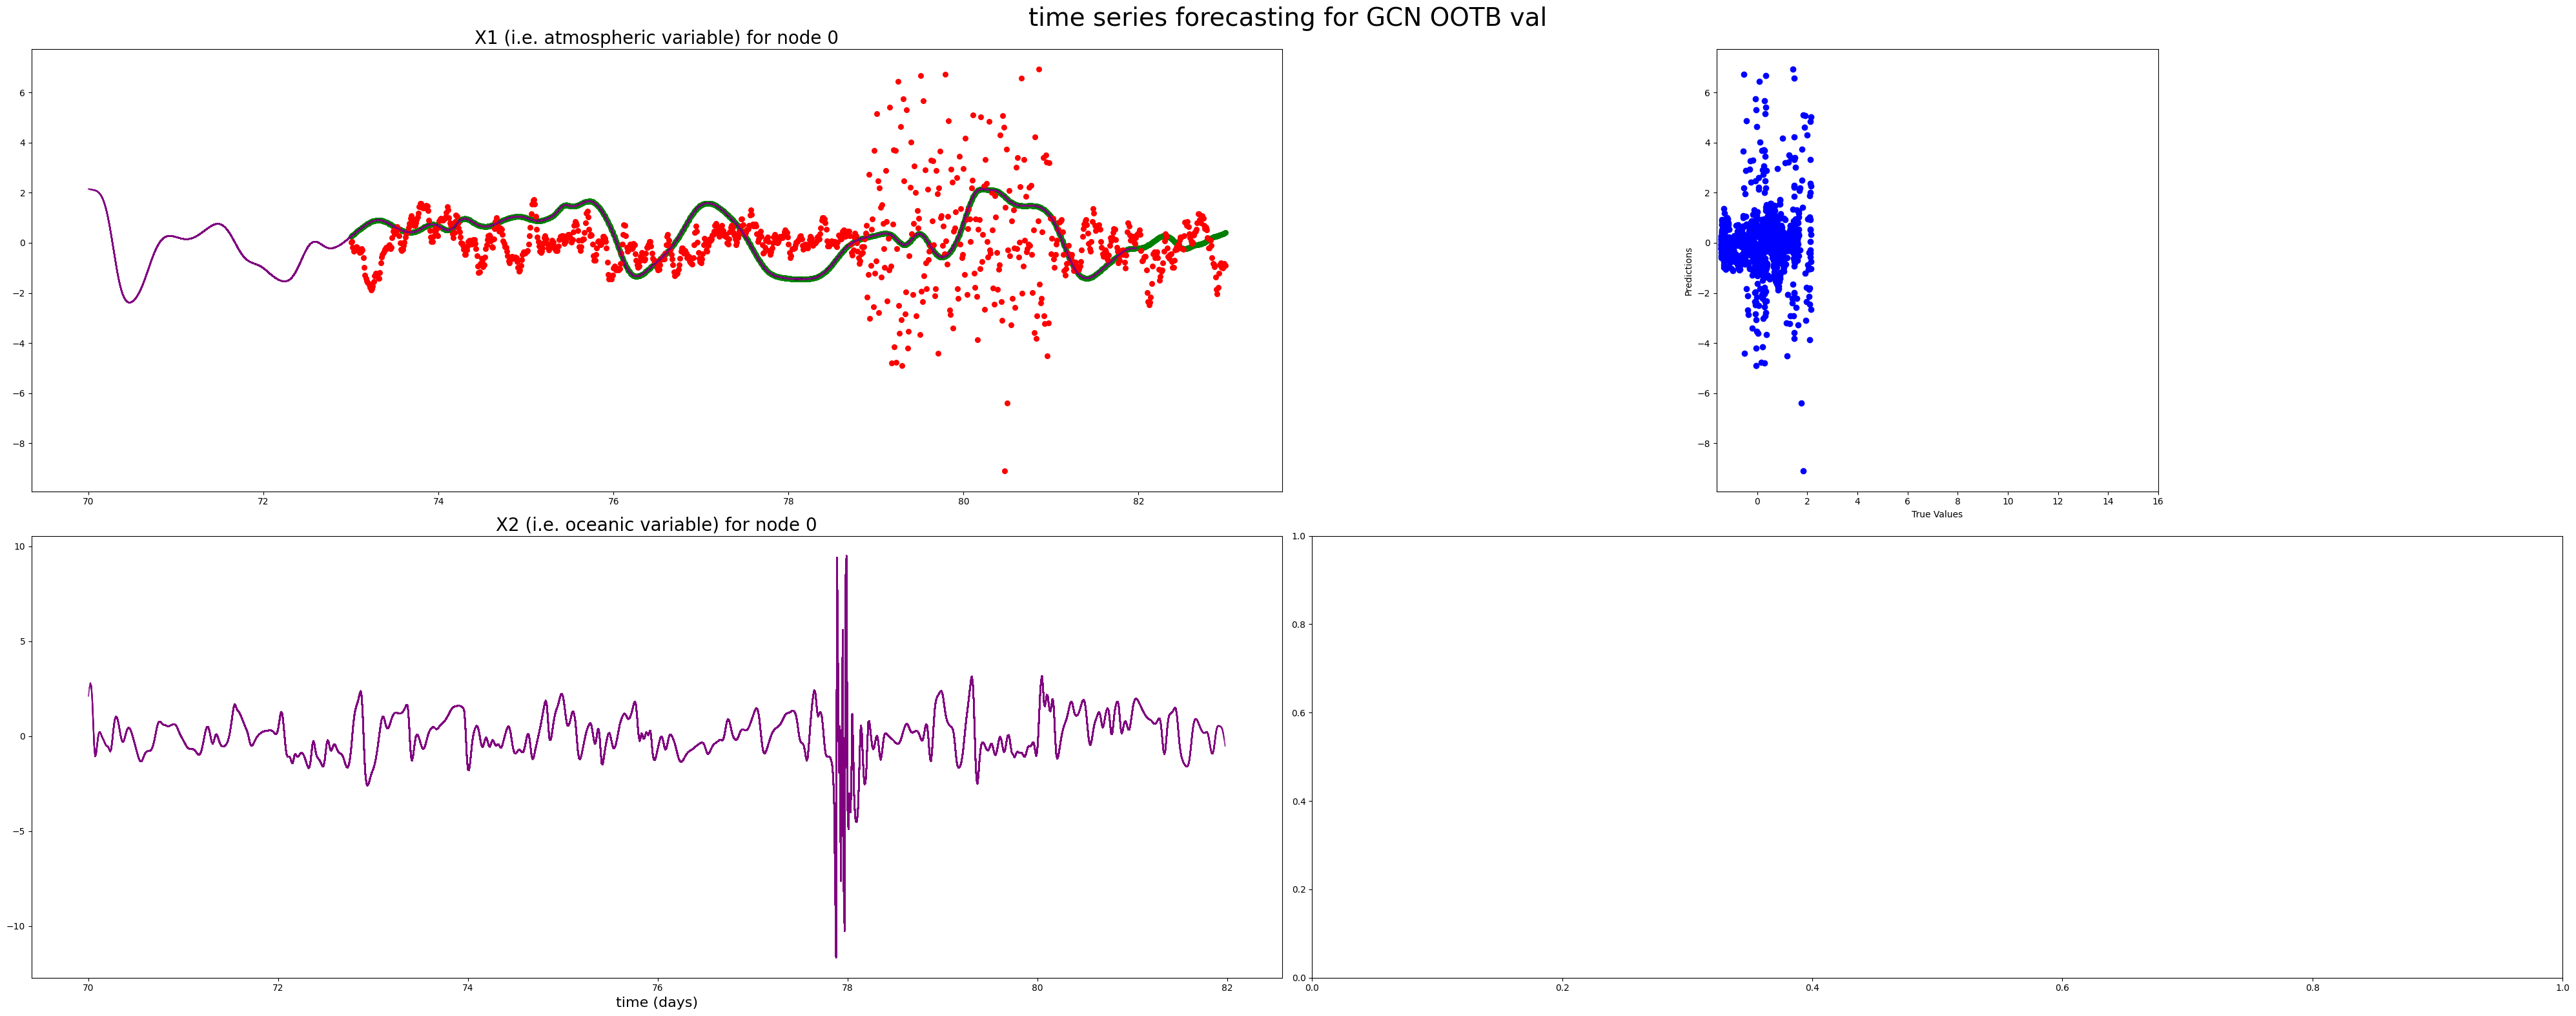

In [ ]:
fig_train_loss, fig_train_pred, fig_val_pred = plot_model_results(
    train[:1000], val[:1000], model, history)

side note: why are the outputs different every time? is there another seed we need to set? 